In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

In [2]:
dm = em.rModel(2,3)
A = 100000
I = 1
dm.xsection('default',A,I)
dm.material('default', 200000)
n1 = dm.node('1',  0.0,  0.0)
n2 = dm.node('2',  8.0,  0.0)
n3 = dm.node('3',  8.0,  6.0)
n4 = dm.node('4', 16.0,  6.0)

a = dm.beam('A', n1,  n2)
b = dm.beam('B', n2,  n3)
c = dm.beam('C', n3,  n4)

dm.hinge(c, n4)

a.w['y'] = -10

dm.hinge(a, n1)

dm.fix(n1, ['x','y','rz'])
dm.fix(n4, ['y', 'rz'])

dm.DOF = [[5, 6, 7],[5, 1, 2], [3, 1, 4],[3, 8, 9]]

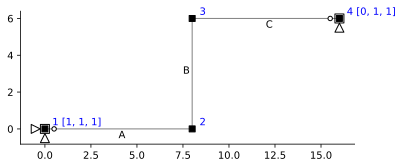

In [3]:
fig, ax = plt.subplots()
em.plot_structure(dm, ax)

## Part 1

Determine the basic forces in all elements.

In [4]:
B = em.B_matrix(dm)
P = em.P_vector(B)
B.c

,$A_1$,$A_3$,$B_1$,$B_2$,$B_3$,$C_1$,$C_2$
$1$,0.0,-0.125,1.0,-0.000000,-0.000000,-0.0,0.125
$2$,0.0,1.000,0.0,1.000000,0.000000,0.0,0.000
$3$,0.0,0.000,0.0,0.166667,0.166667,1.0,0.000
$4$,0.0,0.000,0.0,0.000000,1.000000,0.0,1.000
$5$,1.0,0.000,-0.0,-0.166667,-0.166667,0.0,0.000
$6$,-0.0,0.125,0.0,0.000000,0.000000,0.0,0.000
$7$,0.0,0.000,0.0,0.000000,0.000000,0.0,0.000
$8$,0.0,0.000,0.0,0.000000,0.000000,0.0,-0.125
$9$,0.0,0.000,0.0,0.000000,0.000000,0.0,0.000


In [5]:
Q0 = em.Q_vector(B).o
B.f.c@Q0

,$P_{{}}$
$1$,10.0
$2$,-80.0
$3$,0.0
$4$,0.0


In [6]:
Uf = em.analysis.SolveDispl(dm)
Uf

,$U_{{ff}}$
$U_{{1}}$,-0.040533
$U_{{2}}$,-0.001867
$U_{{3}}$,-0.003200
$U_{{4}}$,0.002933


In [7]:
Qi = B.bari@(P.f - P.wf)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
Qi.df

In [ ]:
Q = em.Q_vector(B,Qi)

## Part 2

Determine the horizontal and vertical translation at node 3.

In [ ]:
A = em.A_matrix(dm).add_cols(['1', '5']).add_cols(['3', '6']).remove(['7']).remove(['8']).remove('frame-axial')
V = em.V_vector(A)
A.c.df

In [ ]:
F = em.F_matrix(dm)
F.s

In [ ]:
V = F.s@Q
V

In [ ]:
Uf = A.c.inv@V.c
Uf.df